![](https://i.imgur.com/0AUxkXt.png)

# **EXAM - THE DATA ANALYSIS**

<img src='https://www.inzata.com/wp-content/uploads/2020/03/shutterstock_1562999674-scaled.jpg' width=700>

In this section, you will be given one dataset and tasked with related problems to solve using the tools that we learned including: Pandas, Matplotlib, & Seaborn

- The question is open, you should attempt to provide a detailed analysis on those questions.

- Please note that you will also be given points for how well your explain and present your analysis.

__To Answer:__

Write our answers in the __Your Answer__ section under each question. Your answer should contain:
- Python code for data cleaning, manipulation and exploration. Keep the output of the code in your notebook.
- Markdown (Text Cell) for explaination and analysis.

### **Case Study**: Your are given the dataset on the number of **comfirmed**, **deaths**, and **recovery cases** from 2019 Novel Corona Virus. You are required to complete the following tasks 
![](https://www.aljazeera.com/mritems/Images/2020/3/4/b9d6e9c0f8774beda9ce21bb0eacbfe2_7.jpg)

In [ ]:
# Import Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

confirmed  = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths     = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

*Data Dictionary*

Make sure you read this carefully. This will help you a lot.

| Variable | Definition |
|:--:|:--:|
| Province/State | Name of Province and State within the Country |
| Country/Region | Name of Country |
| Lat | Latitude of the Province |
| Long | Longitude of the Province |
| Day Columns | Report data in cummulative sum |

#### **Q1** *(30pts)*: Write a **function** that reports the __latest__ situation of the Corona Virus in a __given country__.

The function takes one argument as input - the country where the report is from, and prints out the following information:
- The country where the report is from
- Total confirmed cases
- Total death
- Total recovered

In [ ]:
# Your code here
# Feel free to add more code and text cells
def country(x):
  Total_deaths =  deaths.set_index('Country/Region').loc[x,'1/22/20':].sum()
  Total_cases = confirmed.set_index('Country/Region').loc[x,'1/22/20':].sum()
  Total_recoveries = recoveries.set_index('Country/Region').loc[x,'1/22/20':].sum()
  
  print('Country: ' + str(x))
  print('Cases: ' + str(Total_cases))
  print('Deaths: ' + str(Total_deaths))
  print('Recoveries: ' + str(Total_recoveries))

country('France')

Country: France
Cases: 1/22/20           0
1/23/20           0
1/24/20           2
1/25/20           3
1/26/20           3
             ...   
9/20/22    35190357
9/21/22    35228660
9/22/22    35267124
9/23/22    35304648
9/24/22    35304648
Length: 977, dtype: int64
Deaths: 1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
9/20/22    155831
9/21/22    155864
9/22/22    155894
9/23/22    155927
9/24/22    155927
Length: 977, dtype: int64
Recoveries: 1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
          ..
9/20/22    0
9/21/22    0
9/22/22    0
9/23/22    0
9/24/22    0
Length: 977, dtype: int64


#### **Q2** *(30pts)* Visualize the situation **until October 31st, 2020**. 

Determine the top 5 countries by the total number of confirmed cases **until October 31st, 2020**. 

From those 5 countries, plot the charts for each of them visualising the number of confirmed, death and recovered cases over time from the beginning **until October 31st, 2020**.  

*There should be three seperate plots for confirmed, death and recovered.*

In [ ]:
top5 = confirmed.set_index('Country/Region').loc[:,'1/22/20':'10/31/20'].sum(axis=1)
top5.sort_values(axis=0,ascending= False).head(5)

Country/Region
US        860844769
India     510439608
Brazil    496868376
Russia    152076173
Spain      87517605
dtype: int64

In [ ]:
deaths2 = deaths.drop(columns= deaths.loc[:,'10/31/20':])
recoveries2 = recoveries.drop(columns = recoveries.loc[:,'10/31/20':])
cases2 = confirmed.drop(columns = confirmed.loc[:,'10/31/20':])


In [ ]:
deaths2.set_index('Country/Region').loc['US','1/22/20':]

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
             ...  
10/26/20    225417
10/27/20    226439
10/28/20    227480
10/29/20    228478
10/30/20    229550
Name: US, Length: 283, dtype: object

In [ ]:
recoveries2.set_index('Country/Region').loc['US','1/22/20':] / cases2.set_index('Country/Region').loc['US','1/22/20':]

1/22/20          0.0
1/23/20          0.0
1/24/20          0.0
1/25/20          0.0
1/26/20          0.0
              ...   
10/26/20     0.39639
10/27/20    0.395929
10/28/20    0.395421
10/29/20     0.39537
10/30/20    0.393651
Name: US, Length: 283, dtype: object

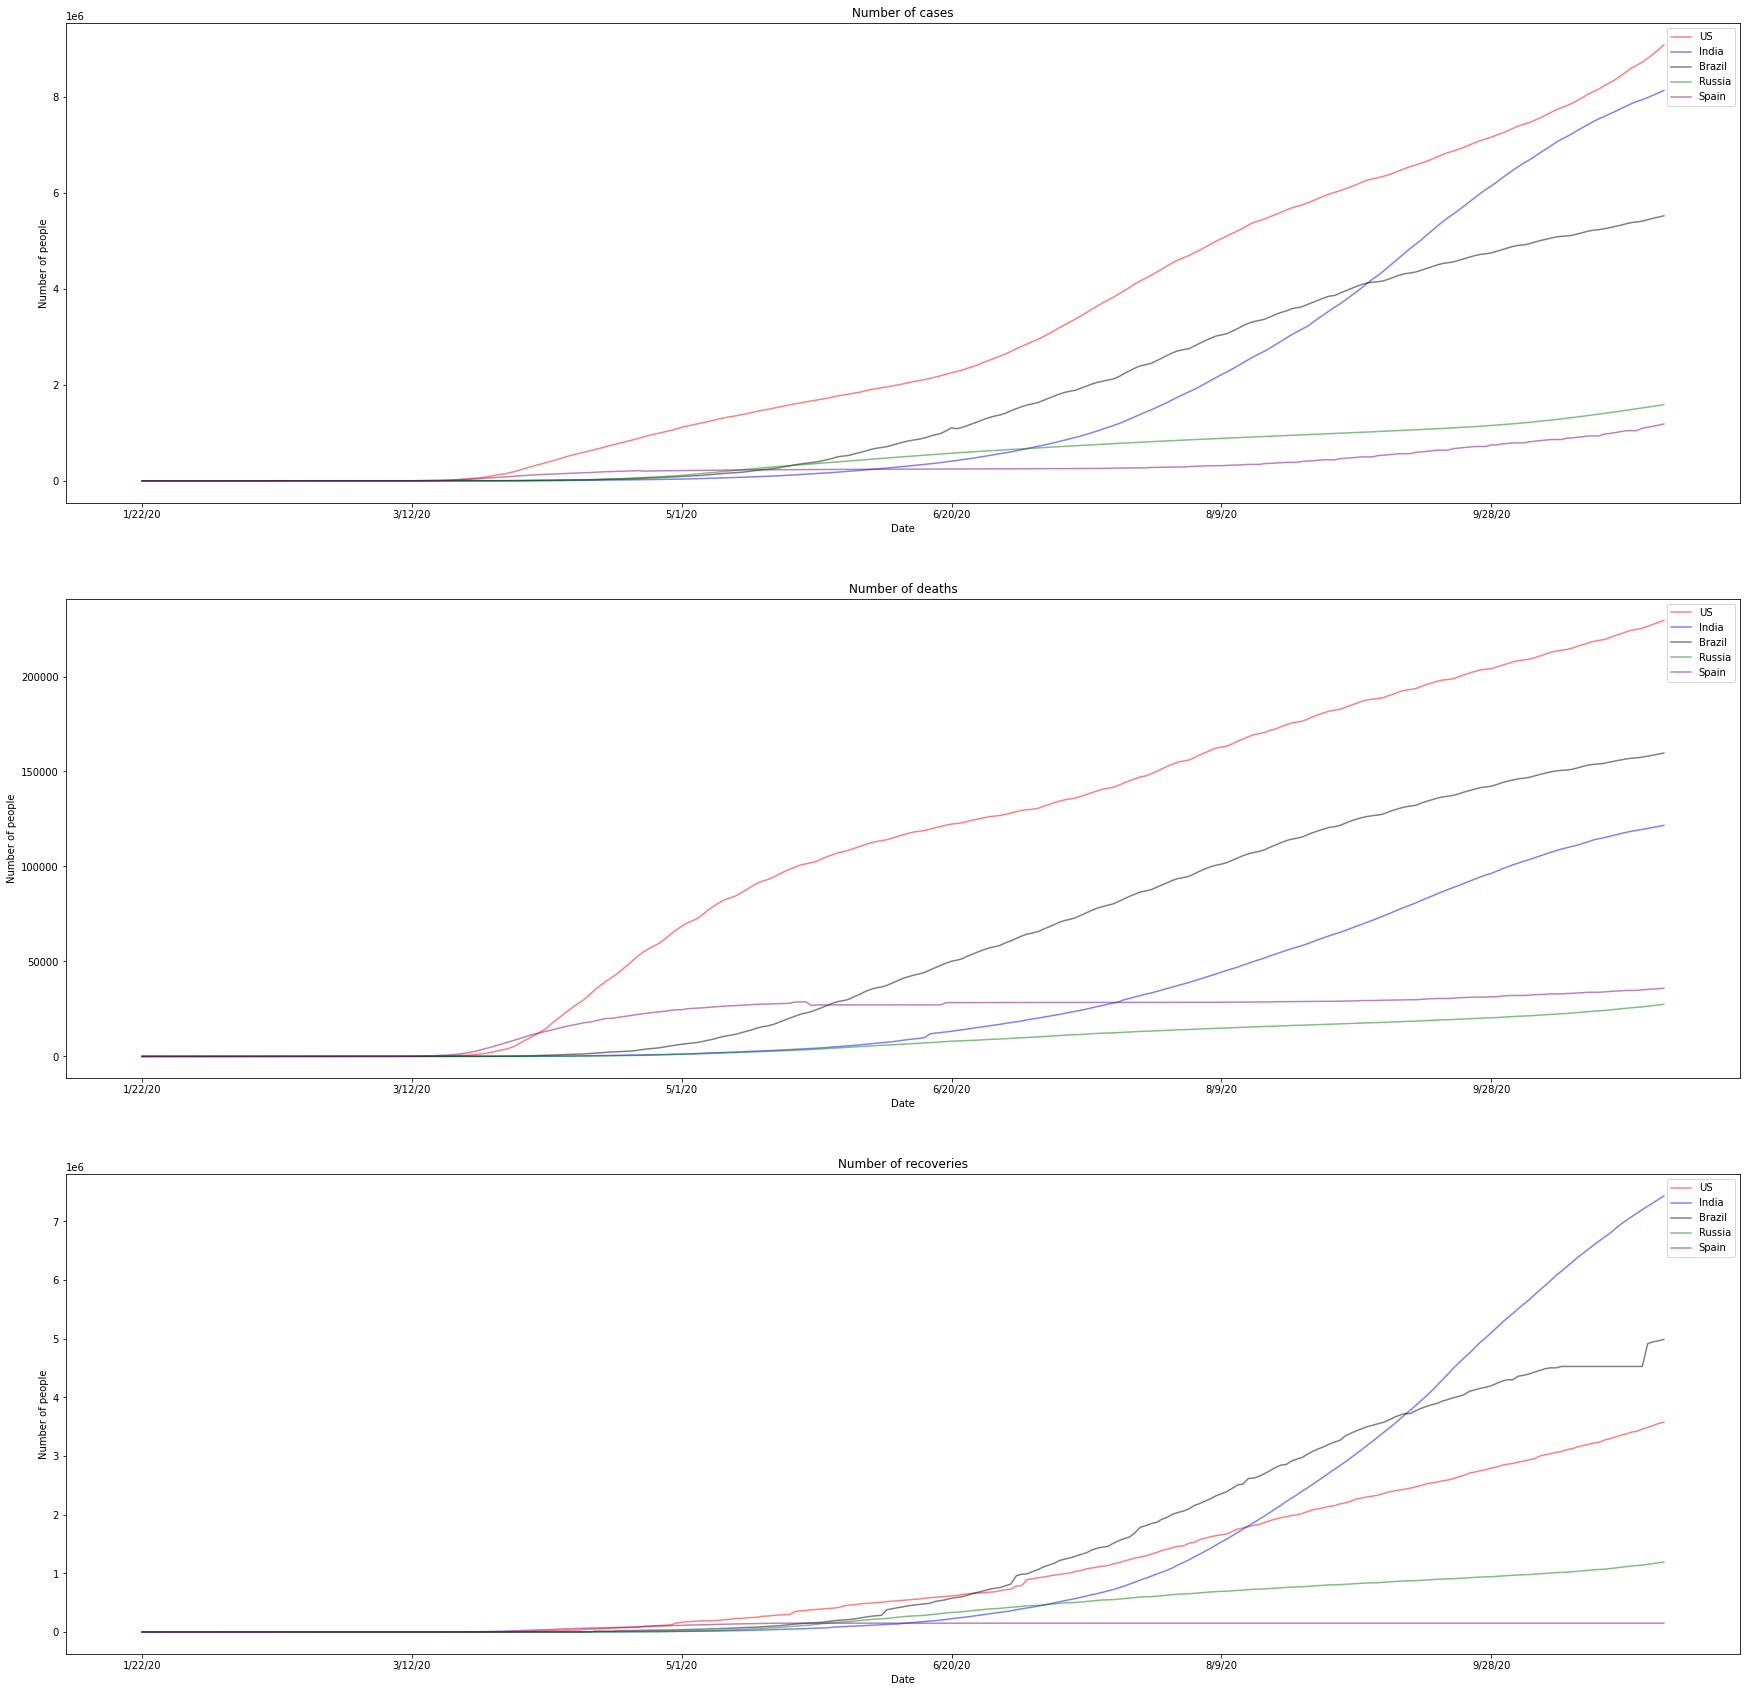

In [ ]:
# Your code here
# Feel free to add more code and text cells

plt.figure(figsize=(30,30))

plt.subplot(311)
cases2.set_index('Country/Region').loc['US','1/22/20':].plot(alpha=0.5, color = 'red')
cases2.set_index('Country/Region').loc['India','1/22/20':].plot(alpha=0.5, color = 'blue')
cases2.set_index('Country/Region').loc['Brazil','1/22/20':].plot(alpha=0.5, color = 'black')
cases2.set_index('Country/Region').loc['Russia','1/22/20':].plot(alpha=0.5, color = 'green')
cases2.set_index('Country/Region').loc['Spain','1/22/20':].plot(alpha=0.5, color = 'purple')
plt.title('Number of cases')
plt.legend(['US','India','Brazil','Russia','Spain'])

plt.xlabel('Date')
plt.ylabel('Number of people')

plt.subplot(312)
deaths2.set_index('Country/Region').loc['US','1/22/20':].plot(alpha=0.5, color = 'red')
deaths2.set_index('Country/Region').loc['India','1/22/20':].plot(alpha=0.5, color = 'blue')
deaths2.set_index('Country/Region').loc['Brazil','1/22/20':].plot(alpha=0.5, color = 'black')
deaths2.set_index('Country/Region').loc['Russia','1/22/20':].plot(alpha=0.5, color = 'green')
deaths2.set_index('Country/Region').loc['Spain','1/22/20':].plot(alpha=0.5, color = 'purple')
plt.title('Number of deaths')
plt.legend(['US','India','Brazil','Russia','Spain'])

plt.xlabel('Date')
plt.ylabel('Number of people')

plt.subplot(313)
recoveries2.set_index('Country/Region').loc['US','1/22/20':].plot(alpha=0.5, color = 'red')
recoveries2.set_index('Country/Region').loc['India','1/22/20':].plot(alpha=0.5, color = 'blue')
recoveries2.set_index('Country/Region').loc['Brazil','1/22/20':].plot(alpha=0.5, color = 'black')
recoveries2.set_index('Country/Region').loc['Russia','1/22/20':].plot(alpha=0.5, color = 'green')
recoveries2.set_index('Country/Region').loc['Spain','1/22/20':].plot(alpha=0.5, color = 'purple')
plt.title('Number of recoveries')
plt.legend(['US','India','Brazil','Russia','Spain'])

plt.xlabel('Date')
plt.ylabel('Number of people')

plt.show()

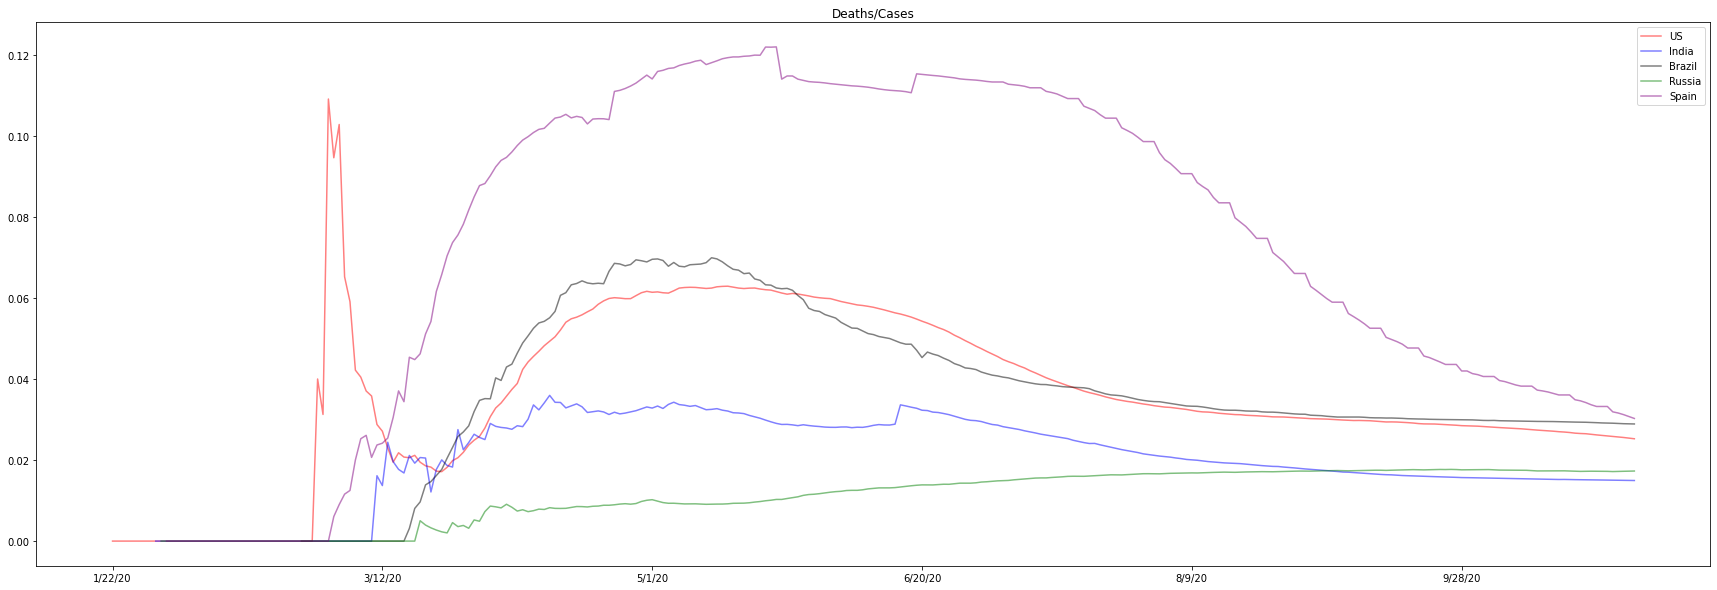

In [ ]:
plt.figure(figsize=(30,10))

(deaths2.set_index('Country/Region').loc['US','1/22/20':] / cases2.set_index('Country/Region').loc['US','1/22/20':]).plot(alpha=0.5, color = 'red')
(deaths2.set_index('Country/Region').loc['India','1/22/20':] / cases2.set_index('Country/Region').loc['India','1/22/20':]).plot(alpha=0.5, color = 'blue')
(deaths2.set_index('Country/Region').loc['Brazil','1/22/20':] / cases2.set_index('Country/Region').loc['Brazil','1/22/20':]).plot(alpha=0.5, color = 'black')
(deaths2.set_index('Country/Region').loc['Russia','1/22/20':] / cases2.set_index('Country/Region').loc['Russia','1/22/20':]).plot(alpha=0.5, color = 'green')
(deaths2.set_index('Country/Region').loc['Spain','1/22/20':] / cases2.set_index('Country/Region').loc['Spain','1/22/20':]).plot(alpha=0.5, color = 'purple')
plt.title('Deaths/Cases')
plt.legend(['US','India','Brazil','Russia','Spain'])
plt.show()

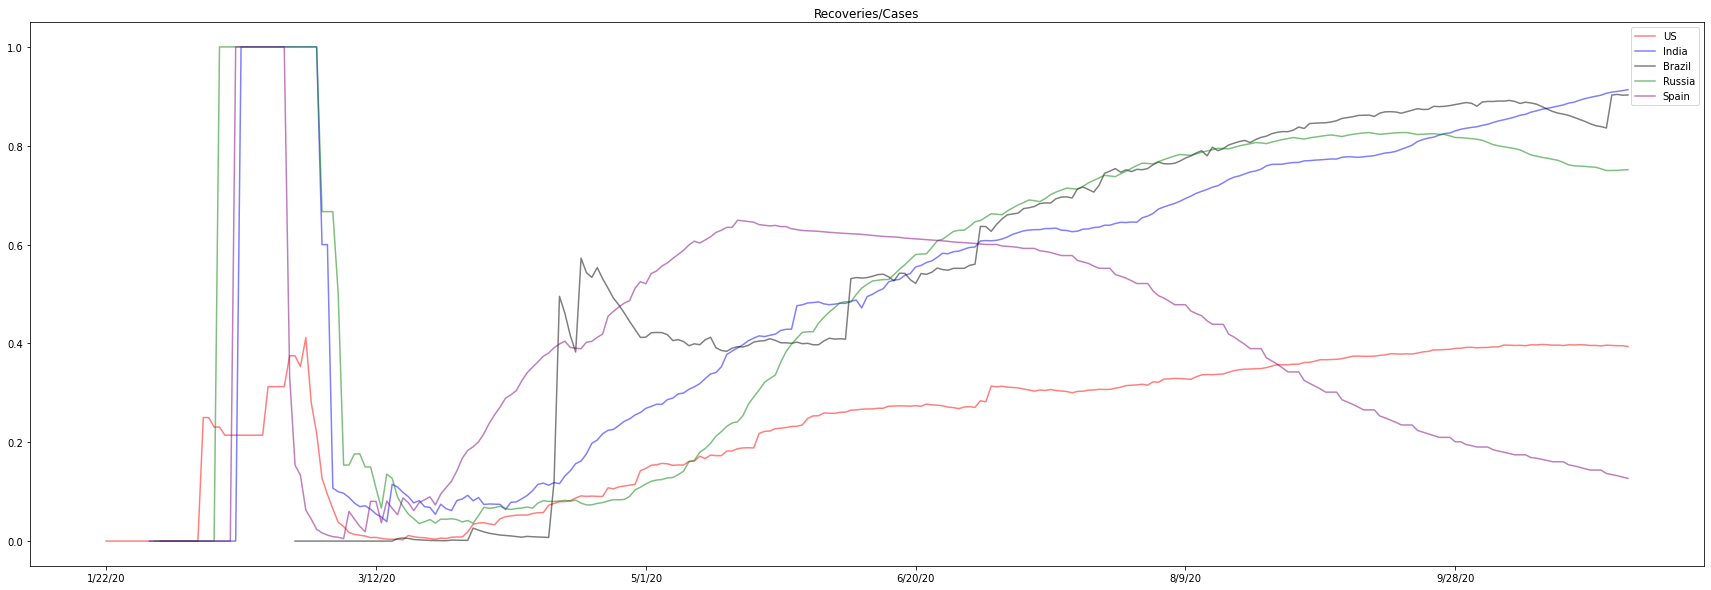

In [ ]:
plt.figure(figsize=(30,10))

(recoveries2.set_index('Country/Region').loc['US','1/22/20':] / cases2.set_index('Country/Region').loc['US','1/22/20':]).plot(alpha=0.5, color = 'red')
(recoveries2.set_index('Country/Region').loc['India','1/22/20':] / cases2.set_index('Country/Region').loc['India','1/22/20':]).plot(alpha=0.5, color = 'blue')
(recoveries2.set_index('Country/Region').loc['Brazil','1/22/20':] / cases2.set_index('Country/Region').loc['Brazil','1/22/20':]).plot(alpha=0.5, color = 'black')
(recoveries2.set_index('Country/Region').loc['Russia','1/22/20':] / cases2.set_index('Country/Region').loc['Russia','1/22/20':]).plot(alpha=0.5, color = 'green')
(recoveries2.set_index('Country/Region').loc['Spain','1/22/20':] / cases2.set_index('Country/Region').loc['Spain','1/22/20':]).plot(alpha=0.5, color = 'purple')
plt.title('Recoveries/Cases')
plt.legend(['US','India','Brazil','Russia','Spain'])
plt.show()

#### **Q3** *(40pts)* (OPEN QUESTION) **Until October 31st, 2020**, among the top 5 countries identified, which country/countries should we pay special attention to? Support your arguments with further analysis and visualization.

_Your explaination & analysis here_

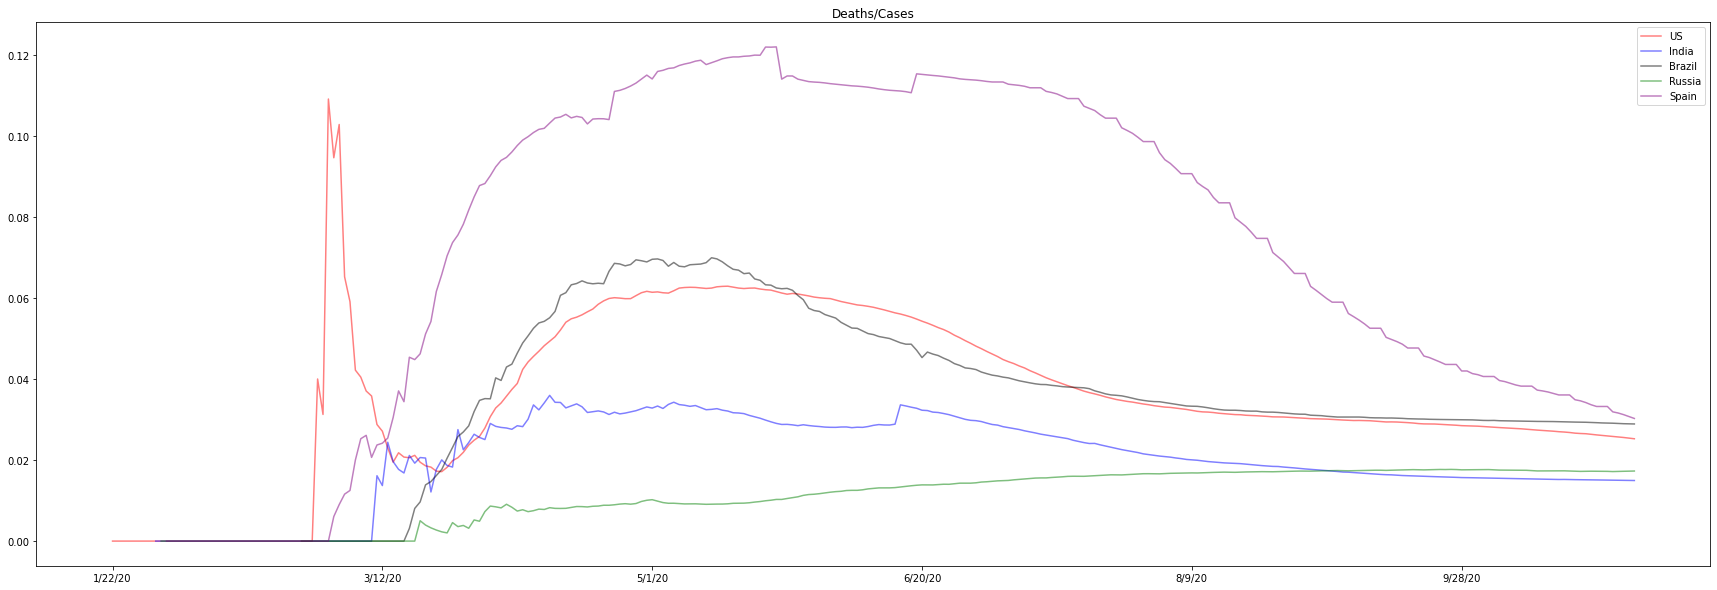

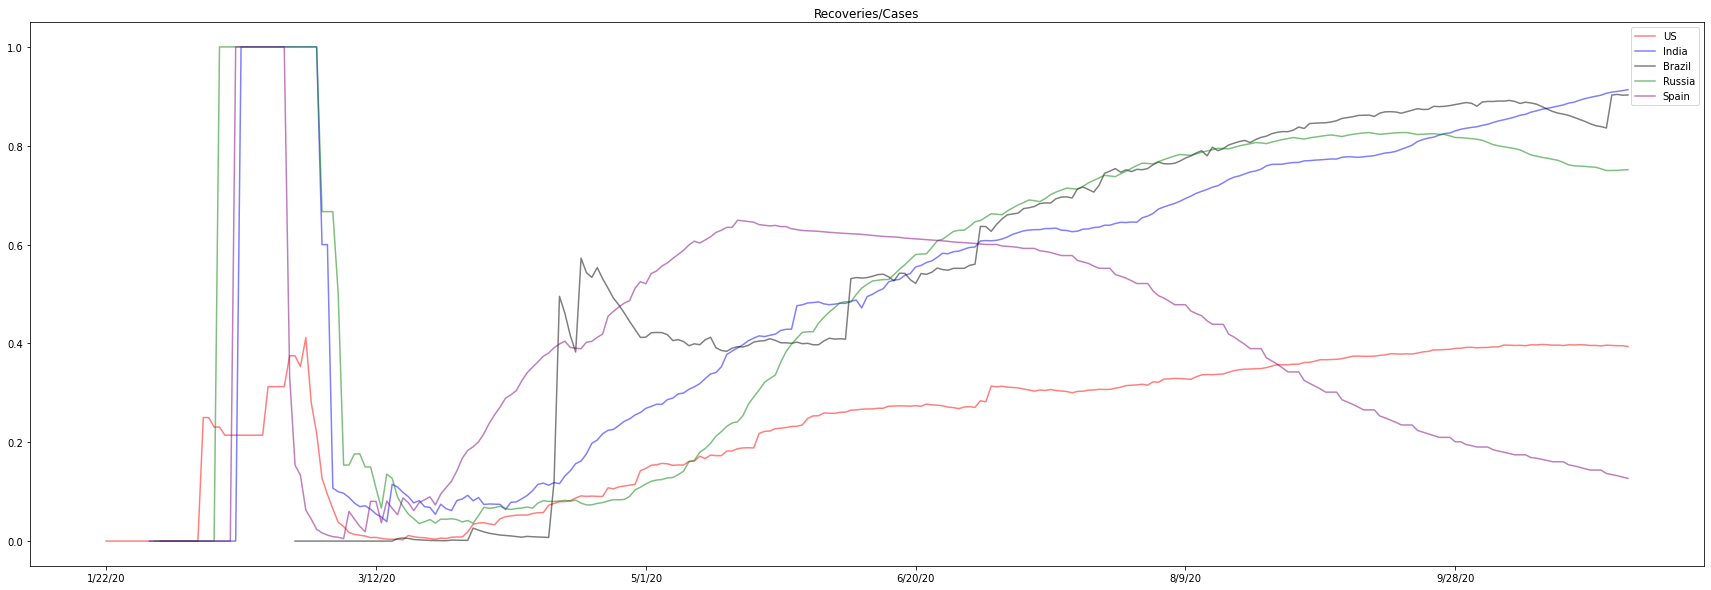

In [ ]:
# Your code here
plt.figure(figsize=(30,10))

(deaths2.set_index('Country/Region').loc['US','1/22/20':] / cases2.set_index('Country/Region').loc['US','1/22/20':]).plot(alpha=0.5, color = 'red')
(deaths2.set_index('Country/Region').loc['India','1/22/20':] / cases2.set_index('Country/Region').loc['India','1/22/20':]).plot(alpha=0.5, color = 'blue')
(deaths2.set_index('Country/Region').loc['Brazil','1/22/20':] / cases2.set_index('Country/Region').loc['Brazil','1/22/20':]).plot(alpha=0.5, color = 'black')
(deaths2.set_index('Country/Region').loc['Russia','1/22/20':] / cases2.set_index('Country/Region').loc['Russia','1/22/20':]).plot(alpha=0.5, color = 'green')
(deaths2.set_index('Country/Region').loc['Spain','1/22/20':] / cases2.set_index('Country/Region').loc['Spain','1/22/20':]).plot(alpha=0.5, color = 'purple')
plt.title('Deaths/Cases')
plt.legend(['US','India','Brazil','Russia','Spain'])
plt.show()

plt.figure(figsize=(30,10))

(recoveries2.set_index('Country/Region').loc['US','1/22/20':] / cases2.set_index('Country/Region').loc['US','1/22/20':]).plot(alpha=0.5, color = 'red')
(recoveries2.set_index('Country/Region').loc['India','1/22/20':] / cases2.set_index('Country/Region').loc['India','1/22/20':]).plot(alpha=0.5, color = 'blue')
(recoveries2.set_index('Country/Region').loc['Brazil','1/22/20':] / cases2.set_index('Country/Region').loc['Brazil','1/22/20':]).plot(alpha=0.5, color = 'black')
(recoveries2.set_index('Country/Region').loc['Russia','1/22/20':] / cases2.set_index('Country/Region').loc['Russia','1/22/20':]).plot(alpha=0.5, color = 'green')
(recoveries2.set_index('Country/Region').loc['Spain','1/22/20':] / cases2.set_index('Country/Region').loc['Spain','1/22/20':]).plot(alpha=0.5, color = 'purple')
plt.title('Recoveries/Cases')
plt.legend(['US','India','Brazil','Russia','Spain'])
plt.show()

# Feel free to add more code and text cells


EXPLANATION

Looking at the graphs of Death/Cases, we can see that from March to August, Spain has a high death/cases ratio, meaning that they have a lot of people died from Covid for a long period of time. Apart from that, we can also see that there is a huge spike on Death/Cases in the US during March, but it barely lasts a month. This suggests that we should pay special attention to Spain and try to reduce the deaths caused by Covid. Even though there are more deaths in US from Covid, they have signficantly more cases and that the ratio of them dying from Covid is much lower. 

However, there is a higher number of unknown cases in the US (meaning they neither die nor recover but still got Covid; You can get this by adding Death/Cases and Recoveries/Cases -> higher number means less unknown) compared to Spain (US: 0.3; Spain: 0.7). Another way you can see that the recoveries/cases and deaths/cases are inversely proportional but in this case, Spain and US both have similar curve instead of inverse curves.Therefore, it's not certain what country has the most death rates. 